In [4]:
import numpy as np
import matplotlib.pyplot as plt

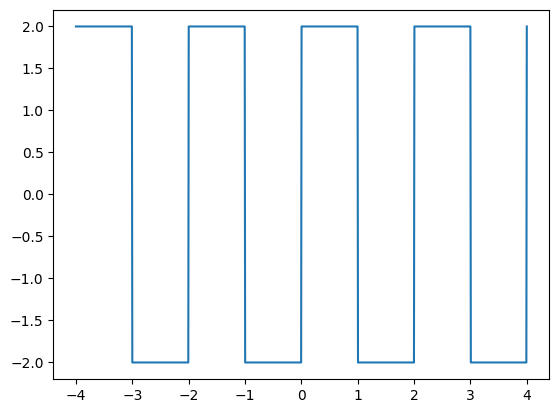

In [5]:
def quadratic_signal(t, A=2, T=2):
    return A - 2 * A * ((t % T) // (T / 2))


x = np.linspace(-4, 4, 1000)
y = quadratic_signal(x)

plt.plot(x, y)
plt.show()

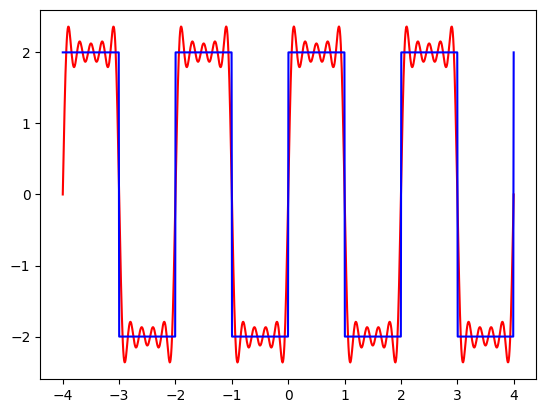

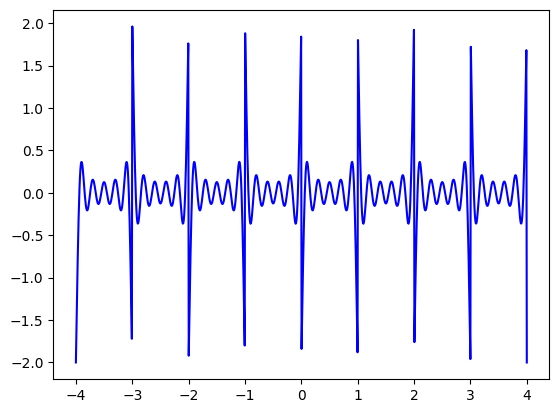

In [6]:
from scipy.integrate import quad

def get_furie_coeffs(n, func, T):

    omega = 2 * np.pi / T

    a0 = 2 / T * quad(lambda t: func(t), 0, T)[0]
    an = []
    bn = []

    for i in range(1, n + 1):
        an.append(2 / T * quad(lambda t: func(t) * np.cos(i * omega * t), 0, T)[0])
        bn.append(2 / T * quad(lambda t: func(t) * np.sin(i * omega * t), 0, T)[0])

    return a0, an, bn

def get_furie(t, n, func, T):
    omega = 2 * np.pi / T
    a0, an, bn = get_furie_coeffs(n, func, T)

    res = a0 / 2  + sum([an[i] * np.cos(omega * (i + 1) * t) + bn[i] * np.sin(omega * (i + 1) * t) for i in range(n)])

    return res

y1 = get_furie(x, 10, quadratic_signal, 2)
plt.plot(x, y1, color='red')

y2 = quadratic_signal(x)
plt.plot(x, y2, color='blue')
plt.show()

plt.plot(x, y1 - y2, color='blue')
plt.show()


#феномен Гибса

/tmp/ipykernel_34463/4139487669.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y1, 'b--', color='blue')


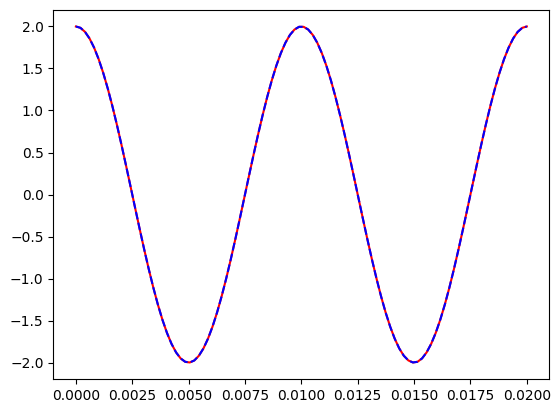

In [7]:
def my_cos(x, f=100, A=2.0):
    return A * np.cos(x * f * 2.0 * np.pi)


f = 100
x = np.linspace(0, 0.02, 100)
y = my_cos(x, f, 2)
plt.plot(x, y, color='red')


y1 = get_furie(x, 1, my_cos, 1 / f)
plt.plot(x, y1, 'b--', color='blue')
plt.show()

a0, an, bn = get_furie_coeffs(10, my_cos, 1 / 100)

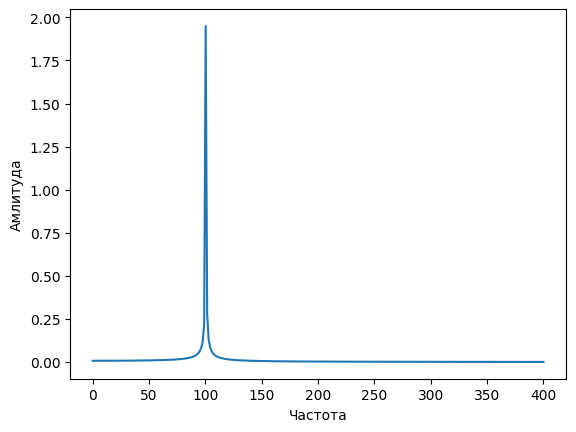

In [8]:
from scipy.fft import fft

def inverse_furie(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


def draw_spectr(func, f=100, fmax=800, N=600, eps=0):
    T = 1 / fmax
    x = np.linspace(0.0, N * T, N)
    if eps > 0:
        noise = np.random.normal(loc=0.0, scale=eps, size=N)
        x = x + noise
    yf = inverse_furie(func(x, f) + eps)

    xf = np.linspace(0.0, fmax / 2, N // 2)
    
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])

    plt.plot(xf, amplitude)
    
draw_spectr(my_cos)
a0, an, bn = get_furie_coeffs(10, my_cos, 1 / f)

xf = np.linspace(0.0, 800 / 2, 600 // 2)
plt.scatter(100, an[0], color='red')
plt.show()


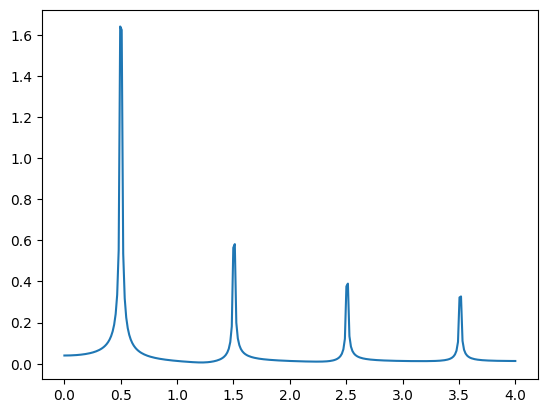

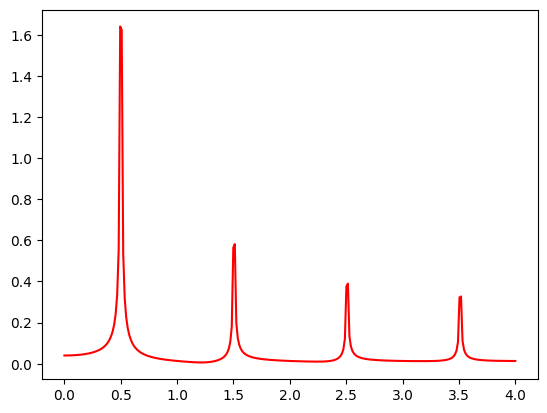

In [9]:
N = 600
fmax = 8
A = 2
T = 1.0 / fmax
f = 2 

draw_spectr(quadratic_signal, f, fmax, N)
plt.show()

x = np.linspace(0.0, N*T, N)
y = quadratic_signal(x)
yff = fft(y)

xf = np.linspace(0.0, fmax / 2, N // 2)
plt.plot(xf, 2.0 / N * np.abs(yff[0:N//2]), color='red')
plt.show()


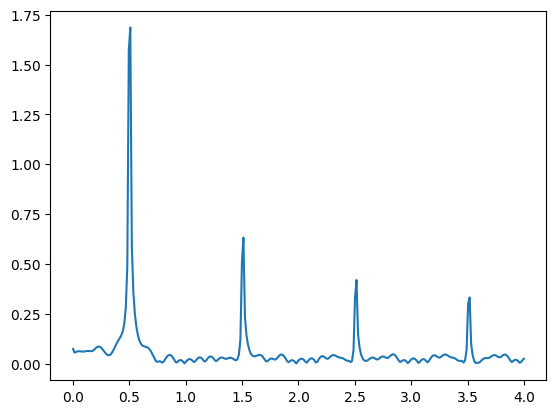

In [10]:
N = 600
fmax = 8
A = 2
T = 1.0 / fmax
f = 2
eps = 1e-2

draw_spectr(quadratic_signal, f, fmax, N, eps)